In [3]:
from PIL import Image
import numpy as np
import colorsys
import os

# root_folder = '/content/drive/MyDrive/Computer Science/Colab Notebooks/1. General Programming/media/'

# os.chdir(root_folder)

# **Changing hue parameters**

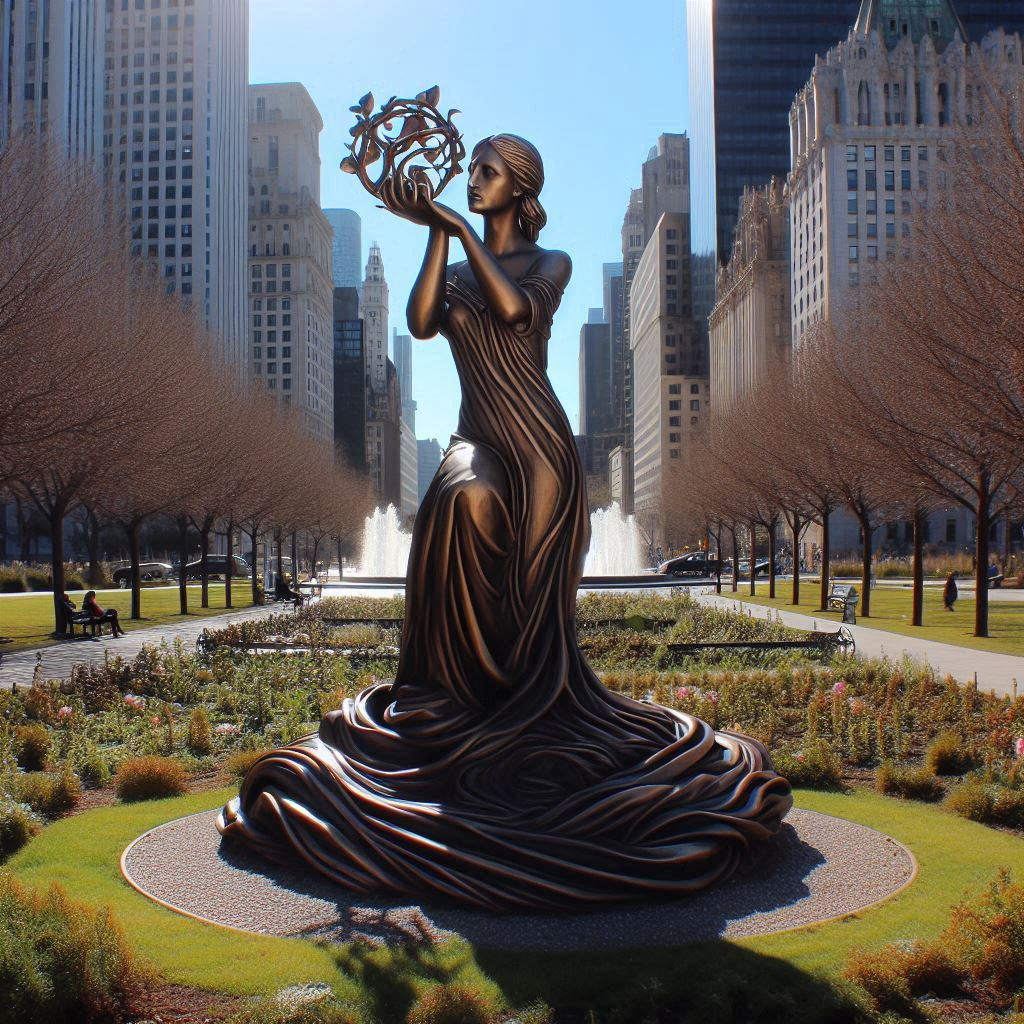

In [11]:
img = Image.open("resources/image_2.jpeg")
display(img)

In [34]:
image_array = np.array(img)
modified_image_array = image_array / 255

max_values = np.amax(modified_image_array, axis=2) # 3 rows of 300 max values
min_values = np.amin(modified_image_array, axis=2) # 3 rows of 300 min values

# Luminance Value
L = (max_values + min_values) / 2         # 3 rows of 300 light values

# Saturation Value
L_mask = L > 0.5
S = np.divide(max_values - min_values, abs(2*L_mask - (max_values + min_values)), where= abs(2*L_mask - (max_values + min_values))!=0)
#S = (max_values - min_values) / abs(2*L_mask - (max_values + min_values)) # 3 rows of 300 saturation values

# Hue Value
# if R is max:
r_max_mask = np.argmax(modified_image_array, axis=2) == 0
g_max_mask = np.argmax(modified_image_array, axis=2) == 1
b_max_mask = np.argmax(modified_image_array, axis=2) == 2

r = modified_image_array[:, :, 0]    # 3 rows of 300 light values
g = modified_image_array[:, :, 1]    # 3 rows of 300 light values
b = modified_image_array[:, :, 2]    # 3 rows of 300 light values

HUE = r_max_mask * np.divide(g-b, max_values-min_values, where=(max_values-min_values)!=0) + \
      g_max_mask * np.divide(2+b-r, max_values-min_values, where=(max_values-min_values)!=0) + \
      b_max_mask * np.divide(4+r-g, max_values-min_values, where=(max_values-min_values)!=0)

HUE = HUE % 360      # 3 rows of 300 HUE values

In [95]:
color_1 = 38 #11
color_2 = 290 #216

mask = (np.minimum(abs(11 - HUE), abs(371 - HUE)) < abs(HUE - 216))
HUE[mask] = color_1
HUE[~mask] = color_2

In [96]:
# Back to RGB
L_mask = L >= 0.5
temp_1 = L_mask * (L+S - L*S) + ~L_mask * (L*(1+S))
temp_2 = 2*L - temp_1

# Hue between 0 and 1
HUE_norm = HUE / 360

# temporary RGB
temp_R = HUE_norm + 0.33333
temp_G = HUE_norm
temp_B = HUE_norm - 0.33333

temp_R[temp_R > 1] = temp_R[temp_R > 1] - 1
temp_B[temp_B < 0] = temp_B[temp_B < 0] + 1

R_cond_1 = (6 * temp_R) < 1                 # Falso
R_cond_2 = ~R_cond_1 * (2 * temp_R < 1)     # True + Condicional
R_cond_3 = ~R_cond_1 *  ~R_cond_2 * (3 * temp_R < 2)
R_cond_4 = ~R_cond_1 *  ~R_cond_2 * ~R_cond_3

G_cond_1 = (6 * temp_G) < 1
G_cond_2 = ~G_cond_1 * (2 * temp_G < 1)
G_cond_3 = ~G_cond_1 * ~G_cond_2 * (3 * temp_G < 2)
G_cond_4 = ~G_cond_1 * ~G_cond_2 * ~G_cond_3

B_cond_1 = (6 * temp_B) < 1
B_cond_2 = ~B_cond_1 * (2 * temp_B < 1)
B_cond_3 = ~B_cond_1 * ~B_cond_2 * (3 * temp_B < 2)
B_cond_4 = ~B_cond_1 * ~B_cond_2 * ~B_cond_3

R_ = R_cond_1 * (temp_2 + 6 * temp_R * (temp_1 - temp_2)) + \
     R_cond_2 * temp_1 + \
     R_cond_3 * (temp_2 + 6 * (0.66666 - temp_R) * (temp_1 - temp_2)) +\
     R_cond_4 * temp_2

G_ = G_cond_1 * (temp_2 + 6 * temp_G * (temp_1 - temp_2)) + \
     G_cond_2 * temp_1 + \
     G_cond_3 * (temp_2 + 6 * (0.66666 - temp_G) * (temp_1 - temp_2)) +\
     G_cond_4 * temp_2

B_ = B_cond_1 * (temp_2 + 6 * temp_B * (temp_1 - temp_2)) + \
     B_cond_2 * temp_1 + \
     B_cond_3 * (temp_2 + 6 * (0.66666 - temp_B) * (temp_1 - temp_2)) +\
     B_cond_4 * temp_2

R_ = (R_*255).astype(np.uint8)
G_ = (G_*255).astype(np.uint8)
B_ = (B_*255).astype(np.uint8)
print(R_)
print(G_)
print(B_)

[[ 87  74  75 ...  49  50  50]
 [ 95  80  81 ...  50  50  50]
 [100  86  87 ...  55  54  54]
 ...
 [ 18  19  19 ...  99 109 121]
 [ 16  16  17 ... 121 144 132]
 [ 13  14  16 ... 140 173 142]]
[[ 84  68  67 ...  38  39  40]
 [ 92  75  73 ...  39  40  40]
 [ 96  80  79 ...  43  42  42]
 ...
 [ 15  16  16 ...  63  73  85]
 [ 13  13  14 ...  83 106  94]
 [ 10  11  13 ... 100 134 103]]
[[79 60 53 ... 20 21 22]
 [87 67 59 ... 21 22 22]
 [90 71 65 ... 23 22 22]
 ...
 [12 13 13 ...  2 12 24]
 [10 10 11 ... 17 41 30]
 [ 7  8 10 ... 32 68 38]]


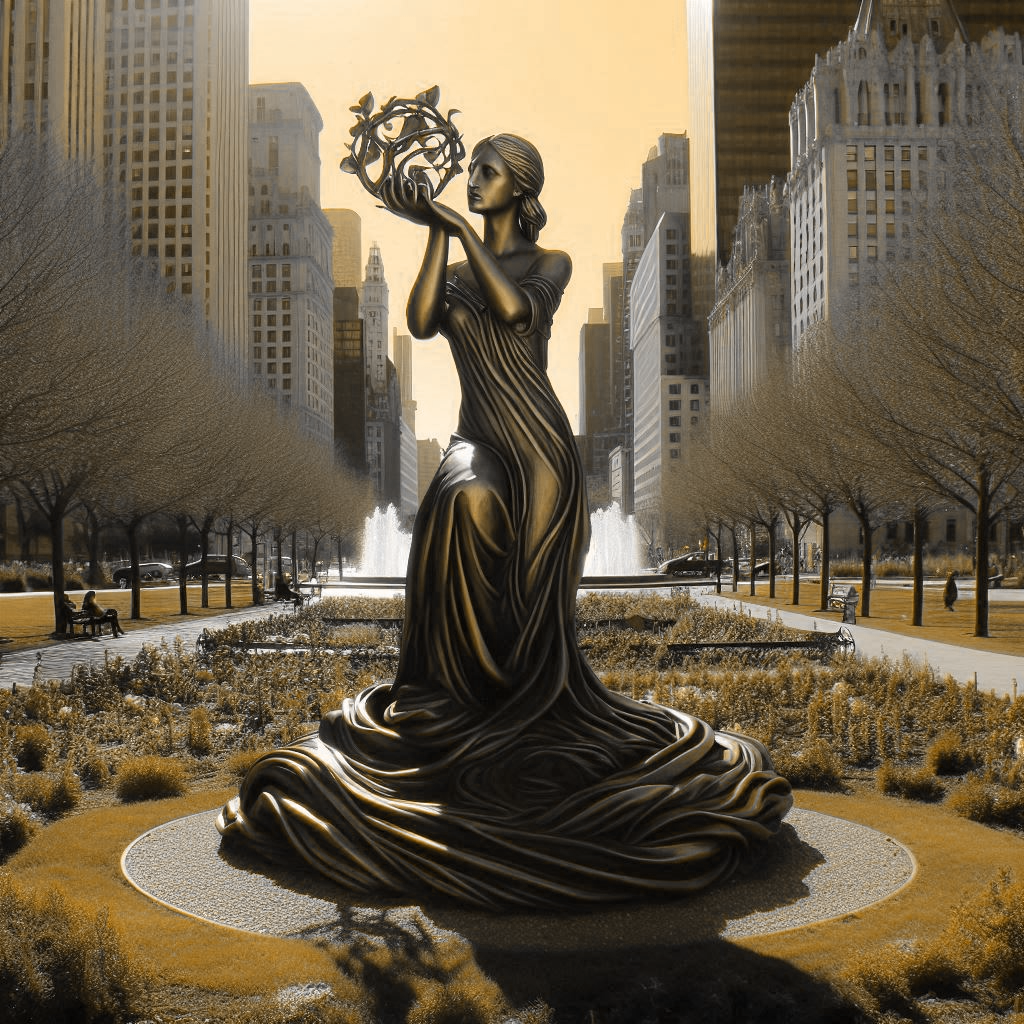

In [97]:
rgb_from_hsl = np.stack((R_, G_, B_), axis=2)
modified_image = Image.fromarray(rgb_from_hsl)

display(modified_image)